In [1]:
%matplotlib inline
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
import expectexception

### Read combined dataset to pandas dataframe

In [229]:
df = pd.read_csv("../data/combinedData.csv")
provider = pd.read_csv("../data/train.csv")

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,13,14,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [230]:
df = df.merge(provider,on="Provider", how="left")

In [231]:
df.shape

(693603, 65)

In [232]:
df.groupby("PotentialFraud").size()

PotentialFraud
No     345415
Yes    212796
dtype: int64

In [233]:
df.head()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Set,Status,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,RheumatoidArthritis,Stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,PotentialFraud
0,0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,10,7.0,7,66.0,Yes
1,1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,1,4,3.0,3,67.0,No
2,2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,7,4.0,4,67.0,No
3,3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,Train,in,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,1,10,9.0,9,95.0,No
4,4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,78900,0.0,NaN,NaN,78969,78701,V5866,59389,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,0,6,NaN,1,95.0,No


In [234]:
df.shape

(693603, 65)

In [235]:
df["Provider"].nunique()

6763

In [236]:
provider.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [237]:
df.shape

(693603, 65)

### Creating df1 with new column "conditions"

In [238]:
df1 = df

In [239]:
illness = df1[["ClaimID",
           "Depression",
           "Alzheimer",
           "RheumatoidArthritis",        
           "Diabetes",
           "KidneyDisease",
           "IschemicHeart",
           "Stroke",
           "Osteoporasis",
           "ObstrPulmonary",
           "HeartFailure",
           "Cancer",
#            "ClmAdmitDiagnosisCode",
#            "ClmDiagnosisCode_1",
#            "ClmDiagnosisCode_2",
#            "ClmDiagnosisCode_3",
#            "ClmDiagnosisCode_4",
#            "ClmDiagnosisCode_5",
#            "ClmDiagnosisCode_6",
#            "ClmDiagnosisCode_7",
#            "ClmDiagnosisCode_8",
#            "ClmDiagnosisCode_9",
#            "ClmDiagnosisCode_10",
#            "ClmProcedureCode_1",
#            "ClmProcedureCode_2",
#            "ClmProcedureCode_3",
#            "ClmProcedureCode_4",
#            "ClmProcedureCode_5",
#            "ClmProcedureCode_6"
           ]]

In [240]:
illness.head()

,ClaimID,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,Osteoporasis,ObstrPulmonary,HeartFailure,Cancer
0,CLM46614,1,1,1,1,1,1,1,0,0,0,0
1,CLM66048,1,1,1,1,1,1,1,0,0,0,0
2,CLM68358,1,1,1,1,1,1,1,0,0,0,0
3,CLM38412,1,0,1,1,1,0,1,0,0,1,0
4,CLM144521,1,0,1,1,1,0,1,0,0,1,0


In [241]:
for col in illness.columns:
    illness[col].replace(1,col, inplace=True)

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [242]:
illness.head()

,ClaimID,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,Osteoporasis,ObstrPulmonary,HeartFailure,Cancer
0,CLM46614,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,0,0,0,0
1,CLM66048,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,0,0,0,0
2,CLM68358,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,0,0,0,0
3,CLM38412,Depression,0,RheumatoidArthritis,Diabetes,KidneyDisease,0,Stroke,0,0,HeartFailure,0
4,CLM144521,Depression,0,RheumatoidArthritis,Diabetes,KidneyDisease,0,Stroke,0,0,HeartFailure,0


In [243]:
cols = [   "Depression",
           "Alzheimer",
           "RheumatoidArthritis",        
           "Diabetes",
           "KidneyDisease",
           "IschemicHeart",
           "Stroke",
           "Osteoporasis",
           "ObstrPulmonary",
           "HeartFailure",
           "Cancer"
           ]

illness["preconditions"] = illness[cols].values.tolist()

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [244]:
illness["preconditions"] = illness["preconditions"].apply(lambda x: list(filter(lambda a: a != 0, x)))

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [245]:
illness["preconditions"] = illness["preconditions"].apply(lambda x: tuple(x))

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [246]:
illness.drop(cols, axis=1, inplace=True)

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [247]:
illness.head()

,ClaimID,preconditions
0,CLM46614,"(Depression, Alzheimer, RheumatoidArthritis, D..."
1,CLM66048,"(Depression, Alzheimer, RheumatoidArthritis, D..."
2,CLM68358,"(Depression, Alzheimer, RheumatoidArthritis, D..."
3,CLM38412,"(Depression, RheumatoidArthritis, Diabetes, Ki..."
4,CLM144521,"(Depression, RheumatoidArthritis, Diabetes, Ki..."


In [248]:
df1 = df1.merge(illness, on="ClaimID")

In [249]:
df1.head()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Set,Status,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,RheumatoidArthritis,Stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,PotentialFraud,preconditions
0,0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,10,7.0,7,66.0,Yes,"(Depression, Alzheimer, RheumatoidArthritis, D..."
1,1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,1,4,3.0,3,67.0,No,"(Depression, Alzheimer, RheumatoidArthritis, D..."
2,2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,7,4.0,4,67.0,No,"(Depression, Alzheimer, RheumatoidArthritis, D..."
3,3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,Train,in,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,1,10,9.0,9,95.0,No,"(Depression, RheumatoidArthritis, Diabetes, Ki..."
4,4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,78900,0.0,NaN,NaN,78969,78701,V5866,59389,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,0,6,NaN,1,95.0,No,"(Depression, RheumatoidArthritis, Diabetes, Ki..."


### Extract ClaimID and boolean columns for diagnosed illness

In [250]:
diag = df[["ClaimID",
           "Depression",
           "Alzheimer",
           "RheumatoidArthritis",        
           "Diabetes",
           "KidneyDisease",
           "IschemicHeart",
           "Stroke",
           "Osteoporasis",
           "ObstrPulmonary",
           "HeartFailure",
           "Cancer",
           ]]

In [251]:
diag.head()

,ClaimID,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,Osteoporasis,ObstrPulmonary,HeartFailure,Cancer
0,CLM46614,1,1,1,1,1,1,1,0,0,0,0
1,CLM66048,1,1,1,1,1,1,1,0,0,0,0
2,CLM68358,1,1,1,1,1,1,1,0,0,0,0
3,CLM38412,1,0,1,1,1,0,1,0,0,1,0
4,CLM144521,1,0,1,1,1,0,1,0,0,1,0


In [252]:
diag = diag.fillna(0).set_index('ClaimID')

In [253]:
diag.head()

,Depression,Alzheimer,RheumatoidArthritis,Diabetes,KidneyDisease,IschemicHeart,Stroke,Osteoporasis,ObstrPulmonary,HeartFailure,Cancer
ClaimID,,,,,,,,,,,
CLM46614,1,1,1,1,1,1,1,0,0,0,0
CLM66048,1,1,1,1,1,1,1,0,0,0,0
CLM68358,1,1,1,1,1,1,1,0,0,0,0
CLM38412,1,0,1,1,1,0,1,0,0,1,0
CLM144521,1,0,1,1,1,0,1,0,0,1,0


In [254]:
diag.shape

(693603, 11)

### Most Frequent Items Visualization

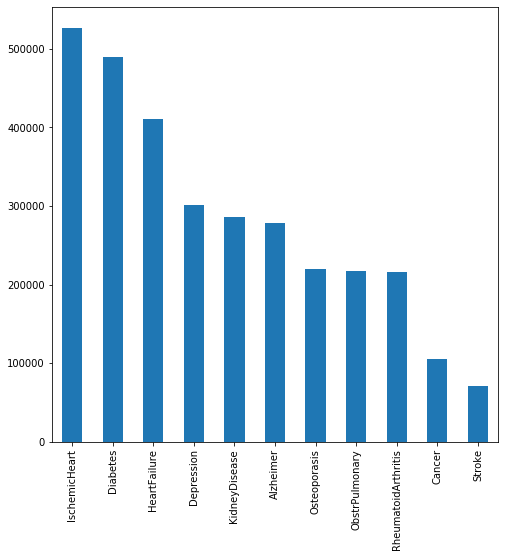

In [255]:
count = diag.sum(axis = 0).sort_values(ascending=False)
count.plot(kind="bar")

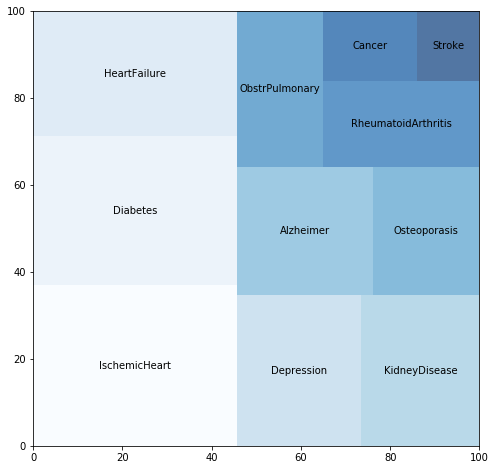

In [256]:
import squarify
plt.rcParams['figure.figsize']=(8,8)
Items = count.to_frame()
size = Items[0].values
lab = Items.index
color = plt.cm.Blues(np.linspace(0,2,22))
squarify.plot(sizes=size, label=lab, alpha = 0.7, color=color)
#plt.title('Tree map of Most Frequent Items')
#plt.axis('off')
#plt.show()

### Run Apriori Algorithm and Association Rules

In [421]:
frequent_itemsets = apriori(diag, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Depression),(Alzheimer),0.434364,0.402142,0.216559,0.498566,1.239776,0.041883,1.192296
1,(Alzheimer),(Depression),0.402142,0.434364,0.216559,0.538514,1.239776,0.041883,1.225684
2,(Depression),(RheumatoidArthritis),0.434364,0.310957,0.163506,0.376426,1.210537,0.028437,1.104989
3,(RheumatoidArthritis),(Depression),0.310957,0.434364,0.163506,0.525814,1.210537,0.028437,1.192856
4,(Depression),(Diabetes),0.434364,0.705953,0.347886,0.800910,1.134509,0.041246,1.476957


In [422]:
rules.sort_values("lift")

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
62,(IschemicHeart),(Osteoporasis),0.759334,0.317396,0.258247,0.340097,1.071522,0.017238,1.034400
63,(Osteoporasis),(IschemicHeart),0.317396,0.759334,0.258247,0.813643,1.071522,0.017238,1.291425
9,(Depression),(IschemicHeart),0.434364,0.759334,0.357706,0.823517,1.084526,0.027879,1.363683
8,(IschemicHeart),(Depression),0.759334,0.434364,0.357706,0.471079,1.084526,0.027879,1.069415
44,(IschemicHeart),(Diabetes),0.759334,0.705953,0.589180,0.775917,1.099106,0.053126,1.312226
...,...,...,...,...,...,...,...,...,...
820,"(KidneyDisease, Alzheimer)","(ObstrPulmonary, Diabetes)",0.210804,0.266394,0.102126,0.484461,1.818586,0.045969,1.422988
1413,"(KidneyDisease, IschemicHeart, HeartFailure)","(ObstrPulmonary, Diabetes)",0.290734,0.266394,0.141990,0.488386,1.833319,0.064541,1.433904
1432,"(ObstrPulmonary, Diabetes)","(KidneyDisease, IschemicHeart, HeartFailure)",0.266394,0.290734,0.141990,0.533008,1.833319,0.064541,1.518798
1418,"(IschemicHeart, ObstrPulmonary, Diabetes)","(KidneyDisease, HeartFailure)",0.242544,0.318835,0.141990,0.585422,1.836128,0.064659,1.643033


In [33]:
#rules = rules[(rules['lift'] >= 1)&(rules['confidence'] >= 0.8)].sort_values("lift",ascending=False)

In [423]:
rules = rules[(rules['support'] >= 0.3)&(rules['lift'] >= 1)&(rules['confidence'] >= 0.7)].sort_values("lift",ascending=False)

In [448]:
rules.shape

(20, 12)

### Create New Column with a Set of Antecedents and Consequents Rules - To merge with original Dataset

In [424]:
rules["ante_set"] = rules["antecedents"].apply(lambda x: tuple(x))
rules["con_set"] = rules["consequents"].apply(lambda x: tuple(x))

In [425]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_set,con_set
369,(KidneyDisease),"(IschemicHeart, Diabetes)",0.412772,0.589180,0.323995,0.784925,1.332233,0.080798,1.910124,"(KidneyDisease,)","(IschemicHeart, Diabetes)"
60,(KidneyDisease),(HeartFailure),0.412772,0.591221,0.318835,0.772424,1.306488,0.074795,1.796229,"(KidneyDisease,)","(HeartFailure,)"
366,"(KidneyDisease, IschemicHeart)",(Diabetes),0.363531,0.705953,0.323995,0.891246,1.262472,0.067360,2.703771,"(KidneyDisease, IschemicHeart)","(Diabetes,)"
42,(KidneyDisease),(Diabetes),0.412772,0.705953,0.360310,0.872903,1.236488,0.068912,2.313557,"(KidneyDisease,)","(Diabetes,)"
406,(HeartFailure),"(IschemicHeart, Diabetes)",0.591221,0.589180,0.423662,0.716587,1.216245,0.075326,1.449546,"(HeartFailure,)","(IschemicHeart, Diabetes)"


In [426]:
rules['preconditions'] = rules['ante_set'] + rules['con_set']
#rules['conditions'] = rules.apply(lambda x: x['ante_set'].union(x['con_set']), axis=1)

In [427]:
rules.shape

(20, 12)

In [451]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_set,con_set,preconditions
369,(KidneyDisease),"(IschemicHeart, Diabetes)",0.412772,0.589180,0.323995,0.784925,1.332233,0.080798,1.910124,"(KidneyDisease,)","(IschemicHeart, Diabetes)","(KidneyDisease, IschemicHeart, Diabetes)"
60,(KidneyDisease),(HeartFailure),0.412772,0.591221,0.318835,0.772424,1.306488,0.074795,1.796229,"(KidneyDisease,)","(HeartFailure,)","(KidneyDisease, HeartFailure)"
366,"(KidneyDisease, IschemicHeart)",(Diabetes),0.363531,0.705953,0.323995,0.891246,1.262472,0.067360,2.703771,"(KidneyDisease, IschemicHeart)","(Diabetes,)","(KidneyDisease, IschemicHeart, Diabetes)"
42,(KidneyDisease),(Diabetes),0.412772,0.705953,0.360310,0.872903,1.236488,0.068912,2.313557,"(KidneyDisease,)","(Diabetes,)","(KidneyDisease, Diabetes)"
406,(HeartFailure),"(IschemicHeart, Diabetes)",0.591221,0.589180,0.423662,0.716587,1.216245,0.075326,1.449546,"(HeartFailure,)","(IschemicHeart, Diabetes)","(HeartFailure, IschemicHeart, Diabetes)"


### Combining df1 with Rules

In [431]:
df1.shape

(693603, 66)

In [432]:
df1.head()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Set,Status,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,RheumatoidArthritis,Stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,PotentialFraud,preconditions
0,0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,10,7.0,7,66.0,Yes,"(Depression, Alzheimer, RheumatoidArthritis, D..."
1,1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,1,4,3.0,3,67.0,No,"(Depression, Alzheimer, RheumatoidArthritis, D..."
2,2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,7,4.0,4,67.0,No,"(Depression, Alzheimer, RheumatoidArthritis, D..."
3,3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,Train,in,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,1,10,9.0,9,95.0,No,"(Depression, RheumatoidArthritis, Diabetes, Ki..."
4,4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,78900,0.0,NaN,NaN,78969,78701,V5866,59389,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,0,6,NaN,1,95.0,No,"(Depression, RheumatoidArthritis, Diabetes, Ki..."


In [433]:
df2 = df1

In [434]:
df3 = df1

In [435]:
df3.shape

(693603, 66)

In [268]:
df2.head()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Set,Status,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,RheumatoidArthritis,Stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,PotentialFraud,preconditions
0,0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,10,7.0,7,66.0,Yes,"(Depression, Alzheimer, RheumatoidArthritis, D..."
1,1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,1,4,3.0,3,67.0,No,"(Depression, Alzheimer, RheumatoidArthritis, D..."
2,2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,7,4.0,4,67.0,No,"(Depression, Alzheimer, RheumatoidArthritis, D..."
3,3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,Train,in,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,1,10,9.0,9,95.0,No,"(Depression, RheumatoidArthritis, Diabetes, Ki..."
4,4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,78900,0.0,NaN,NaN,78969,78701,V5866,59389,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,0,6,NaN,1,95.0,No,"(Depression, RheumatoidArthritis, Diabetes, Ki..."


In [280]:
setlist = [("Alzheimer", "IschemicHeart"),
("Depression", "Diabetes"),
("Depression", "Diabetes", "IschemicHeart"),
("Depression", "IschemicHeart"),
("Diabetes", "IschemicHeart"),
("KidneyDisease", "HeartFailure"),
("KidneyDisease", "IschemicHeart")]

df2["preconditions"].isin(setlist).mean()

0.04500845584577921

In [300]:
df3.head()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Set,Status,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,RheumatoidArthritis,Stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,PotentialFraud,preconditions
0,0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,10,7.0,7,66.0,Yes,"(Depression, Alzheimer, RheumatoidArthritis, D..."
1,1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,1,4,3.0,3,67.0,No,"(Depression, Alzheimer, RheumatoidArthritis, D..."
2,2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,7,4.0,4,67.0,No,"(Depression, Alzheimer, RheumatoidArthritis, D..."
3,3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,Train,in,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,1,10,9.0,9,95.0,No,"(Depression, RheumatoidArthritis, Diabetes, Ki..."
4,4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,78900,0.0,NaN,NaN,78969,78701,V5866,59389,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,0,6,NaN,1,95.0,No,"(Depression, RheumatoidArthritis, Diabetes, Ki..."


In [510]:
df4 = df3.groupby(["Provider","preconditions"])

In [329]:
df4_unstack = df4.size().unstack()

In [336]:
df4_unstack.head()

preconditions,(),"(Alzheimer,)","(Alzheimer, Cancer)","(Alzheimer, Diabetes)","(Alzheimer, Diabetes, Cancer)","(Alzheimer, Diabetes, HeartFailure)","(Alzheimer, Diabetes, HeartFailure, Cancer)","(Alzheimer, Diabetes, IschemicHeart)","(Alzheimer, Diabetes, IschemicHeart, Cancer)","(Alzheimer, Diabetes, IschemicHeart, HeartFailure)","(Alzheimer, Diabetes, IschemicHeart, HeartFailure, Cancer)","(Alzheimer, Diabetes, IschemicHeart, ObstrPulmonary)","(Alzheimer, Diabetes, IschemicHeart, ObstrPulmonary, Cancer)","(Alzheimer, Diabetes, IschemicHeart, ObstrPulmonary, HeartFailure)","(Alzheimer, Diabetes, IschemicHeart, ObstrPulmonary, HeartFailure, Cancer)","(Alzheimer, Diabetes, IschemicHeart, Osteoporasis)","(Alzheimer, Diabetes, IschemicHeart, Osteoporasis, Cancer)","(Alzheimer, Diabetes, IschemicHeart, Osteoporasis, HeartFailure)","(Alzheimer, Diabetes, IschemicHeart, Osteoporasis, HeartFailure, Cancer)","(Alzheimer, Diabetes, IschemicHeart, Osteoporasis, ObstrPulmonary)","(Alzheimer, Diabetes, IschemicHeart, Osteoporasis, ObstrPulmonary, Cancer)","(Alzheimer, Diabetes, IschemicHeart, Osteoporasis, ObstrPulmonary, HeartFailure)","(Alzheimer, Diabetes, IschemicHeart, Osteoporasis, ObstrPulmonary, HeartFailure, Cancer)","(Alzheimer, Diabetes, IschemicHeart, Stroke)","(Alzheimer, Diabetes, IschemicHeart, Stroke, Cancer)","(Alzheimer, Diabetes, IschemicHeart, Stroke, HeartFailure)","(Alzheimer, Diabetes, IschemicHeart, Stroke, HeartFailure, Cancer)","(Alzheimer, Diabetes, IschemicHeart, Stroke, ObstrPulmonary)","(Alzheimer, Diabetes, IschemicHeart, Stroke, ObstrPulmonary, Cancer)","(Alzheimer, Diabetes, IschemicHeart, Stroke, ObstrPulmonary, HeartFailure)","(Alzheimer, Diabetes, IschemicHeart, Stroke, ObstrPulmonary, HeartFailure, Cancer)","(Alzheimer, Diabetes, IschemicHeart, Stroke, Osteoporasis)","(Alzheimer, Diabetes, IschemicHeart, Stroke, Osteoporasis, Cancer)","(Alzheimer, Diabetes, IschemicHeart, Stroke, Osteoporasis, HeartFailure)","(Alzheimer, Diabetes, IschemicHeart, Stroke, Osteoporasis, HeartFailure, Cancer)","(Alzheimer, Diabetes, IschemicHeart, Stroke, Osteoporasis, ObstrPulmonary)","(Alzheimer, Diabetes, IschemicHeart, Stroke, Osteoporasis, ObstrPulmonary, Cancer)","(Alzheimer, Diabetes, IschemicHeart, Stroke, Osteoporasis, ObstrPulmonary, HeartFailure)","(Alzheimer, Diabetes, IschemicHeart, Stroke, Osteoporasis, ObstrPulmonary, HeartFailure, Cancer)","(Alzheimer, Diabetes, KidneyDisease)","(Alzheimer, Diabetes, KidneyDisease, Cancer)","(Alzheimer, Diabetes, KidneyDisease, HeartFailure)","(Alzheimer, Diabetes, KidneyDisease, HeartFailure, Cancer)","(Alzheimer, Diabetes, KidneyDisease, IschemicHeart)","(Alzheimer, Diabetes, KidneyDisease, IschemicHeart, Cancer)","(Alzheimer, Diabetes, KidneyDisease, IschemicHeart, HeartFailure)","(Alzheimer, Diabetes, KidneyDisease, IschemicHeart, HeartFailure, Cancer)","(Alzheimer, Diabetes, KidneyDisease, IschemicHeart, ObstrPulmonary)","(Alzheimer, Diabetes, KidneyDisease, IschemicHeart, ObstrPulmonary, Cancer)","(Alzheimer, Diabetes, KidneyDisease, IschemicHeart, ObstrPulmonary, HeartFailure)","(Alzheimer, Diabetes, KidneyDisease, IschemicHeart, ObstrPulmonary, HeartFailure, Cancer)","(Alzheimer, Diabetes, KidneyDisease, IschemicHeart, Osteoporasis)","(Alzheimer, Diabetes, KidneyDisease, IschemicHeart, Osteoporasis, Cancer)","(Alzheimer, Diabetes, KidneyDisease, IschemicHeart, Osteoporasis, HeartFailure)","(Alzheimer, Diabetes, KidneyDisease, IschemicHeart, Osteoporasis, HeartFailure, Cancer)","(Alzheimer, Diabetes, KidneyDisease, IschemicHeart, Osteoporasis, ObstrPulmonary)","(Alzheimer, Diabetes, KidneyDisease, IschemicHeart, Osteoporasis, ObstrPulmonary, Cancer)","(Alzheimer, Diabetes, KidneyDisease, IschemicHeart, Osteoporasis, ObstrPulmonary, HeartFailure)","(Alzheimer, Diabetes, KidneyDisease, IschemicHeart, Osteoporasis, ObstrPulmonary, HeartFailure, Cancer)","(Alzheimer, Diabetes, KidneyDisease, IschemicHeart, Stroke)","(Alzheimer, Diabetes, KidneyDisease, IschemicHeart, Str

In [339]:
provider_norule = df4_unstack.sum(axis=1)

In [340]:
provider_rule = df4_unstack[[("Alzheimer", "IschemicHeart"),
("Depression", "Diabetes"),
("Depression", "Diabetes", "IschemicHeart"),
("Depression", "IschemicHeart"),
("Diabetes", "IschemicHeart"),
("KidneyDisease", "HeartFailure"),
("KidneyDisease", "IschemicHeart")]].sum(axis=1)

In [349]:
provider_above5 = provider_rule/provider_norule

In [363]:
provider_above5 = provider_above5.reset_index()

In [364]:
provider_above5.head()

,Provider,0
0,PRV51001,0.000000
1,PRV51002,0.048780
2,PRV51003,0.068182
3,PRV51004,0.053691
4,PRV51005,0.055794


In [393]:
provider_above5_summary = provider_above5[provider_above5.iloc[:,1] >= 0.045]

In [394]:
provider_below5_summary = provider_above5[provider_above5.iloc[:,1] < 0.045]

In [395]:
provider_above5_summary = provider_above5_summary.merge(provider, on="Provider")

In [396]:
provider_below5_summary = provider_below5_summary.merge(provider, on="Provider")

In [397]:
provider_above5_summary

,Provider,0,PotentialFraud
0,PRV51003,0.068182,Yes
1,PRV51004,0.053691,No
2,PRV51005,0.055794,Yes
3,PRV51011,0.120690,No
4,PRV51014,0.100000,No
...,...,...,...
1990,PRV57741,0.133333,No
1991,PRV57744,0.052632,No
1992,PRV57746,0.095238,No
1993,PRV57760,0.318182,No


In [398]:
provider_below5_summary

,Provider,0,PotentialFraud
0,PRV51001,0.000000,No
1,PRV51007,0.027778,No
2,PRV51008,0.023256,No
3,PRV51012,0.020833,No
4,PRV51013,0.021739,No
...,...,...,...
3410,PRV57757,0.000000,No
3411,PRV57758,0.000000,No
3412,PRV57759,0.000000,No
3413,PRV57761,0.000000,No


In [399]:
provider_above5_summary.groupby("PotentialFraud")["Provider"].count()
# ~9%

PotentialFraud
No     1815
Yes     180
Name: Provider, dtype: int64

In [401]:
provider_below5_summary.groupby("PotentialFraud")["Provider"].count()
# ~9.54%

PotentialFraud
No     3089
Yes     326
Name: Provider, dtype: int64

In [449]:
rules.shape

(20, 12)

In [417]:
df2.shape

(693603, 66)

In [436]:
df1_rules = rules.merge(df2, on="preconditions", how="inner")

In [437]:
df1_rules.shape

(33551, 77)

In [221]:
33563/693603

0.04838935241052879

In [440]:
df1_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_set,con_set,preconditions,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Set,Status,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,RheumatoidArthritis,Stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,PotentialFraud
0,(KidneyDisease),(HeartFailure),0.412772,0.591221,0.318835,0.772424,1.306488,0.074795,1.796229,"(KidneyDisease,)","(HeartFailure,)","(KidneyDisease, HeartFailure)",3738,BENE14301,CLM53023,2009-05-28,2009-06-02,PRV52821,5000,PHY314410,NaN,NaN,2009-05-28,42843,1068.0,2009-06-02,292,42833,2724,V4581,30002,3569,5119,2449,70719,5854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1939-12-01,NaN,1,1,0,Indiana,430,12,12,0,1,1,0,0,0,0,0,0,0,0,5200,1068,110,30,0,2,0,10,6.0,6,69.0,Yes
1,(KidneyDisease),(HeartFailure),0.412772,0.591221,0.318835,0.772424,1.306488,0.074795,1.796229,"(KidneyDisease,)","(HeartFailure,)","(KidneyDisease, HeartFailure)",3739,BENE14301,CLM410635,2009-06-12,2009-06-12,PRV52859,40,PHY332283,NaN,PHY322105,NaN,NaN,0.0,NaN,NaN,79677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1939-12-01,NaN,1,1,0,Indiana,430,12,12,0,1,1,0,0,0,0,0,0,0,0,5200,1068,110,30,0,2,0,1,NaN,1,70.0,No
2,(KidneyDisease),(HeartFailure),0.412772,0.591221,0.318835,0.772424,1.306488,0.074795,1.796229,"(KidneyDisease,)","(HeartFailure,)","(KidneyDisease, HeartFailure)",3740,BENE14301,CLM696680,2009-11-24,2009-11-24,PRV52928,70,PHY394708,NaN,NaN,NaN,NaN,0.0,NaN,NaN,V774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1939-12-01,NaN,1,1,0,Indiana,430,12,12,0,1,1,0,0,0,0,0,0,0,0,5200,1068,110,30,0,2,0,1,NaN,1,70.0,No
3,(KidneyDisease),(HeartFailure),0.412772,0.591221,0.318835,0.772424,1.306488,0.074795,1.796229,"(KidneyDisease,)","(HeartFailure,)","(KidneyDisease, HeartFailure)",3919,BENE14432,CLM59201,2009-07-11,2009-07-14,PRV57177,14000,PHY364023,NaN,NaN,2009-07-11,51884,1068.0,2009-07-14,203,5070,11289,5849,42789,4019,4254,43853,V667,4280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1958-10-01,NaN,1,2,0,Virginia,711,12,12,0,1,1,0,0,0,0,0,0,0,0,14000,1068,550,10,0,2,0,10,4.0,4,51.0,Yes
4,(KidneyDisease),(HeartFailure),0.412772,0.591221,0.318835,0.772424,1.306488,0.074795,1.796229,"(KidneyDisease,)","(HeartFailure,)","(KidneyDisease, HeartFailure)",3920,BENE14432,CLM191780,2009-02-13,2009-02-13,PRV57177,30,PHY374332,PHY379110,PHY424921,NaN,NaN,0.0,NaN,NaN,V011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1958-10-01,NaN,1,2,0,Virginia,711,12,12,0,1,1,0,0,0,0,0,0,0,0,14000,1068,550,10,0,2,0,1,NaN,1,50.0,Yes


In [452]:
df1_rules.groupby("preconditions")["ClaimID"].count()

preconditions
(Alzheimer, Diabetes)                     2333
(Alzheimer, IschemicHeart)                3378
(Depression, Diabetes)                    3206
(Depression, Diabetes, IschemicHeart)     5177
(Depression, IschemicHeart)               4678
(Diabetes, IschemicHeart)                12528
(KidneyDisease, HeartFailure)              637
(KidneyDisease, IschemicHeart)            1614
Name: ClaimID, dtype: int64

In [453]:
df1_rules_summary = df1_rules.groupby(["preconditions","PotentialFraud"]).size().unstack()

In [454]:
df1_rules_summary["total"] = df1_rules_summary["No"] + df1_rules_summary["Yes"]

In [455]:
df1_rules_summary["No"] = df1_rules_summary["No"]/df1_rules_summary["total"] *100
df1_rules_summary["Yes"] = df1_rules_summary["Yes"]/df1_rules_summary["total"] * 100

In [456]:
df1_rules_summary.head()

PotentialFraud,No,Yes,total
preconditions,,,
"(Alzheimer, Diabetes)",60.383387,39.616613,1878
"(Alzheimer, IschemicHeart)",62.770246,37.229754,2729
"(Depression, Diabetes)",61.089645,38.910355,2588
"(Depression, Diabetes, IschemicHeart)",64.266602,35.733398,4111
"(Depression, IschemicHeart)",63.160677,36.839323,3784


In [500]:
preconditions = df1_rules[["ClaimID","preconditions"]]

In [501]:
preconditions["count"] = 1

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [502]:
preconditions.head()

,ClaimID,preconditions,count
0,CLM53023,"(KidneyDisease, HeartFailure)",1
1,CLM410635,"(KidneyDisease, HeartFailure)",1
2,CLM696680,"(KidneyDisease, HeartFailure)",1
3,CLM59201,"(KidneyDisease, HeartFailure)",1
4,CLM191780,"(KidneyDisease, HeartFailure)",1


In [503]:
preconditions = preconditions.pivot_table(values='count', index="ClaimID", columns='preconditions', aggfunc='first')

In [504]:
preconditions = preconditions.fillna(0)

In [505]:
preconditions

preconditions,"(Alzheimer, Diabetes)","(Alzheimer, IschemicHeart)","(Depression, Diabetes)","(Depression, Diabetes, IschemicHeart)","(Depression, IschemicHeart)","(Diabetes, IschemicHeart)","(KidneyDisease, HeartFailure)","(KidneyDisease, IschemicHeart)"
ClaimID,,,,,,,,
CLM110033,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
CLM110135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CLM110228,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
CLM110231,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
CLM110321,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
CLM80900,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
CLM80964,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
CLM80977,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Analyse Results with Diagnosis and Procedure Codes

In [460]:
df_ip = pd.read_csv("../data/code_specialty_ip.csv")
df_op = pd.read_csv("../data/code_specialty_op.csv")

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [461]:
new_df = df1_rules

In [462]:
df_ipop = pd.concat([df_ip,df_op],join='inner').merge(provider, on="Provider").merge(new_df,on="ClaimID")

In [463]:
df_ipop.shape

(26974, 147)

In [464]:
df_ipop.head()

,Unnamed: 0_x,BeneID_x,ClaimID,ClaimStartDt_x,ClaimEndDt_x,Provider_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,ClmAdmitDiagnosisCode_x,DeductibleAmtPaid_x,ClmDiagnosisCode_1_x,ClmDiagnosisCode_2_x,ClmDiagnosisCode_3_x,ClmDiagnosisCode_4_x,ClmDiagnosisCode_5_x,ClmDiagnosisCode_6_x,ClmDiagnosisCode_7_x,ClmDiagnosisCode_8_x,ClmDiagnosisCode_9_x,ClmDiagnosisCode_10_x,ClmProcedureCode_1_x,ClmProcedureCode_2_x,ClmProcedureCode_3_x,ClmProcedureCode_4_x,ClmProcedureCode_5_x,ClmProcedureCode_6_x,DOB_x,DOD_x,Gender_x,Race_x,RenalDiseaseIndicator_x,State_x,County_x,NoOfMonths_PartACov_x,NoOfMonths_PartBCov_x,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt_x,IPAnnualDeductibleAmt_x,OPAnnualReimbursementAmt_x,OPAnnualDeductibleAmt_x,Age_x,cardiology,urology,endocrinology,emergency,general,infectious,oncology,hematology,psychiatry,neurology,pulmonology,gastroenterology,ob-gyn,dermatology,orthopedics,congenital,neonatology,PotentialFraud_x,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,ante_set,con_set,preconditions,Unnamed: 0_y,BeneID_y,ClaimStartDt_y,ClaimEndDt_y,Provider_y,InscClaimAmtReimbursed_y,AttendingPhysician_y,OperatingPhysician_y,OtherPhysician_y,AdmissionDt,ClmAdmitDiagnosisCode_y,DeductibleAmtPaid_y,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1_y,ClmDiagnosisCode_2_y,ClmDiagnosisCode_3_y,ClmDiagnosisCode_4_y,ClmDiagnosisCode_5_y,ClmDiagnosisCode_6_y,ClmDiagnosisCode_7_y,ClmDiagnosisCode_8_y,ClmDiagnosisCode_9_y,ClmDiagnosisCode_10_y,ClmProcedureCode_1_y,ClmProcedureCode_2_y,ClmProcedureCode_3_y,ClmProcedureCode_4_y,ClmProcedureCode_5_y,ClmProcedureCode_6_y,Set,Status,DOB_y,DOD_y,Gender_y,Race_y,RenalDiseaseIndicator_y,State_y,County_y,NoOfMonths_PartACov_y,NoOfMonths_PartBCov_y,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,RheumatoidArthritis,Stroke,IPAnnualReimbursementAmt_y,IPAnnualDeductibleAmt_y,OPAnnualReimbursementAmt_y,OPAnnualDeductibleAmt_y,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age_y,PotentialFraud_y
0,39909,BENE157145,CLM49309,2009-05-01,2009-05-02,PRV55912,4000,PHY352158,NaN,NaN,78659,1068.0,9693,78009,E9504,78900,4111,30401,78079,E8490,V1041,V4365,NaN,NaN,NaN,NaN,NaN,NaN,1944-01-01,NaN,1,1,0,39,670,12,12,2,2,2,2,2,1,2,1,2,2,2,4010,1068,5230,330,65.0,2,0,0,5,4,1,0,0,1,0,0,0,0,0,0,0,0,Yes,(Depression),(IschemicHeart),0.434364,0.759334,0.357706,0.823517,1.084526,0.027879,1.363683,"(Depression,)","(IschemicHeart,)","(Depression, IschemicHeart)",164131,BENE157145,2009-05-01,2009-05-02,PRV55912,4000,PHY352158,NaN,NaN,2009-05-01,78659,1068.0,2009-05-02,904,9693,78009,E9504,78900,4111,30401,78079,E8490,V1041,V4365,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1944-01-01,NaN,1,1,0,Pennsylvania,670,12,12,0,0,0,0,0,1,0,1,0,0,0,4010,1068,5230,330,0,2,0,11,2.0,2,65.0,Yes
1,310910,BENE100200,CLM413025,2009-06-13,2009-06-13,PRV55912,20,NaN,NaN,NaN,V5842,0.0,V5889,1623,V1083,2137,1726,1460,V1021,7020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1923-08-01,NaN,2,1,0,10,490,12,12,2,2,2,2,2,2,1,1,2,2,2,4000,1068,20,20,86.0,0,1,0,0,3,2,4,0,0,0,0,0,0,1,0,0,0,Yes,(Diabetes),(IschemicHeart),0.705953,0.759334,0.589180,0.834588,1.099106,0.053126,1.454955,"(Diabetes,)","(IschemicHeart,)","(Diabetes, IschemicHeart)",99833,BENE100200,2009-06-13,2009-06-13,PRV55912,20,NaN,NaN,NaN,NaN,V5842,0.0,NaN,NaN,V5889,1623,V1083,2137,1726,1460,V1021,7020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1923-08-01,NaN,0,1,0,Florida,490,12,12,0,0,0,0,0,0,1,1,0,0,0,4000,1068,20,20,0,2,0,9,NaN,1,86.0,Yes
2,2969,BENE21733,CLM41561,2009-03-07,2009-03-09,PRV55907,6000,PHY424658,NaN,NaN,72989,1068.0,3384,V6284,29410,2449,4019,2769,V854,V142,30000,NaN,NaN,NaN,NaN,NaN,NaN

In [465]:
code_analysis = df_ipop[["ClaimID",
                   'cardiology',
                   'urology',
                   'endocrinology',
                   'emergency',
                   'general',
                   'infectious',
                   'oncology',
                   'hematology',
                   'psychiatry',
                   'neurology',
                   'pulmonology',
                   'gastroenterology',
                   'ob-gyn',
                   'dermatology',
                   'orthopedics',
                   'congenital',
                   'neonatology']]

In [466]:
new = df_ipop[['ClaimID','ChronicCond_Alzheimer',
                    'ChronicCond_Heartfailure',
                    'ChronicCond_KidneyDisease',
                    'ChronicCond_Cancer',
                    'ChronicCond_ObstrPulmonary',
                    'ChronicCond_Depression',
                    'ChronicCond_Diabetes',
                    'ChronicCond_IschemicHeart',
                    'ChronicCond_Osteoporasis',
                    'ChronicCond_rheumatoidarthritis',
                    'ChronicCond_stroke']]
new.replace(2, 0,inplace=True)
new.columns = ['ClaimID','Alzheimer',
                    'HeartFailure',
                    'KidneyDisease',
                    'Cancer',
                    'ObstrPulmonary',
                    'Depression',
                    'Diabetes',
                    'IschemicHeart',
                    'Osteoporasis',
                    'Rheumatoidarthritis',
                    'Stroke']

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [467]:
new.head()

,ClaimID,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,Rheumatoidarthritis,Stroke
0,CLM49309,0,0,0,0,0,1,0,1,0,0,0
1,CLM413025,0,0,0,0,0,0,1,1,0,0,0
2,CLM41561,1,0,0,0,0,0,0,1,0,0,0
3,CLM64319,0,0,0,0,0,1,1,0,0,0,0
4,CLM703958,0,0,0,0,0,0,1,1,0,0,0


In [468]:
code_analysis = code_analysis.merge(new,on="ClaimID")

In [469]:
code_analysis.head()

,ClaimID,cardiology,urology,endocrinology,emergency,general,infectious,oncology,hematology,psychiatry,neurology,pulmonology,gastroenterology,ob-gyn,dermatology,orthopedics,congenital,neonatology,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,Rheumatoidarthritis,Stroke
0,CLM49309,2,0,0,5,4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,CLM413025,0,1,0,0,3,2,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,CLM41561,1,1,2,0,3,2,0,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,CLM64319,0,1,1,0,1,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,CLM703958,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [470]:
code_analysis.replace(2, 1,inplace=True)
code_analysis.replace(3, 1,inplace=True)
code_analysis.replace(4, 1,inplace=True)
code_analysis.replace(5, 1,inplace=True)
code_analysis.replace(6, 1,inplace=True)
code_analysis.replace(7, 1,inplace=True)
code_analysis.replace(8, 1,inplace=True)
code_analysis.replace(9, 1,inplace=True)
code_analysis.replace(10, 1,inplace=True)
code_analysis.replace(11, 1,inplace=True)
code_analysis.replace(12, 1,inplace=True)
code_analysis.replace(13, 1,inplace=True)
code_analysis.replace(14, 1,inplace=True)
code_analysis.replace(15, 1,inplace=True)

In [471]:
code_analysis = code_analysis.fillna(0).set_index('ClaimID')

In [472]:
code_analysis.head()

,cardiology,urology,endocrinology,emergency,general,infectious,oncology,hematology,psychiatry,neurology,pulmonology,gastroenterology,ob-gyn,dermatology,orthopedics,congenital,neonatology,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,Rheumatoidarthritis,Stroke
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM49309,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
CLM413025,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
CLM41561,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
CLM64319,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
CLM703958,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [473]:
code_analysis.shape

(26974, 28)

### Run Apriori Algorithm and Association Rules

In [506]:
merged = preconditions.merge(code_analysis, on="ClaimID")

In [507]:
merged.head()

,"(Alzheimer, Diabetes)","(Alzheimer, IschemicHeart)","(Depression, Diabetes)","(Depression, Diabetes, IschemicHeart)","(Depression, IschemicHeart)","(Diabetes, IschemicHeart)","(KidneyDisease, HeartFailure)","(KidneyDisease, IschemicHeart)",cardiology,urology,endocrinology,emergency,general,infectious,oncology,hematology,psychiatry,neurology,pulmonology,gastroenterology,ob-gyn,dermatology,orthopedics,congenital,neonatology,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,Rheumatoidarthritis,Stroke
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM110228,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
CLM110231,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
CLM110321,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
CLM110331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
CLM110491,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0


In [509]:
frequent_itemsets1 = apriori(merged, min_support=0.2, use_colnames=True)
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
#rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=0)
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"((Diabetes, IschemicHeart))",(Diabetes),0.374842,0.692815,0.374842,1.000000,1.443386,0.115146,inf
1,(Diabetes),"((Diabetes, IschemicHeart))",0.692815,0.374842,0.374842,0.541042,1.443386,0.115146,1.362125
2,(IschemicHeart),"((Diabetes, IschemicHeart))",0.816564,0.374842,0.374842,0.459048,1.224644,0.068760,1.155663
3,"((Diabetes, IschemicHeart))",(IschemicHeart),0.374842,0.816564,0.374842,1.000000,1.224644,0.068760,inf
4,(general),(cardiology),0.510862,0.355379,0.203381,0.398113,1.120249,0.021831,1.071000
